In [118]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [119]:
# Load in sales csv
sales_data = pd.read_csv("Sales_Data.csv")
# sales_data['Transaction Type'].value_counts() 
# sales_data.head()

In [120]:
# Load in Redbook csv
redbook_data = pd.read_csv('Redbook_data.csv')
redbook_data.dtypes

C:\Users\Amy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Redbook_Code                       object
Make                               object
Brand                              object
Model                              object
MakMod                             object
Variant                            object
Manufacture_year                    int64
Model_year                          int64
Description                        object
Series                             object
Body_type                          object
Cabin_type                         object
Badge                              object
Badge_2                            object
Transmission                       object
Gear_shifter_location              object
Seats                             float64
Engine_CC                         float64
Engine_L                           object
Cylinders                         float64
Drive_type                         object
Srokes                             object
Engine_type                        object
Cylinder_layout                   

In [121]:
# Remove NaN
clean_sales_df = sales_data.dropna()
clean_sales_df = clean_sales_df[clean_sales_df['Country'] != '0']

# Group by sales year
# clean_sales_df = clean_sales_df.groupby(by='Year')
# clean_sales_df = clean_sales_df[clean_sales_df['Vechile Type'] == 'PASSENGER']
clean_sales_grouped = clean_sales_df.groupby(['Year','Country'])['Transactions'].sum()
clean_sales_grouped = clean_sales_grouped.reset_index()

# clean_sales_grouped.nlargest(10,'Transactions')
clean_sales_grouped.head(100)

KeyError: 'Country'

In [ ]:
# Take the top 5 countries for each year
country_largest_2020 = clean_sales_grouped[clean_sales_grouped.Year == 2020].nlargest(4,['Year','Transactions'])
country_largest_2019 = clean_sales_grouped[clean_sales_grouped.Year == 2019].nlargest(4,['Year','Transactions'])
country_largest_2018 = clean_sales_grouped[clean_sales_grouped.Year == 2018].nlargest(4,['Year','Transactions'])
country_largest_2017 = clean_sales_grouped[clean_sales_grouped.Year == 2017].nlargest(4,['Year','Transactions'])
country_largest_2016 = clean_sales_grouped[clean_sales_grouped.Year == 2016].nlargest(4,['Year','Transactions'])
country_largest_2015 = clean_sales_grouped[clean_sales_grouped.Year == 2015].nlargest(4,['Year','Transactions'])
country_largest_2014 = clean_sales_grouped[clean_sales_grouped.Year == 2014].nlargest(4,['Year','Transactions'])
country_largest_2013 = clean_sales_grouped[clean_sales_grouped.Year == 2013].nlargest(4,['Year','Transactions'])
country_largest_2012 = clean_sales_grouped[clean_sales_grouped.Year == 2012].nlargest(4,['Year','Transactions'])

country_largest_2012

,Year,Country,Transactions
14,2012,JAPAN,131827
27,2012,THAILAND,71114
1,2012,AUSTRALIA,55446
8,2012,GERMANY,53796


In [ ]:
# Group above datasets into new dataframe
# frames = [country_largest_2012, country_largest_2013, country_largest_2014]
country_concat = pd.concat([country_largest_2012, country_largest_2013,country_largest_2014, country_largest_2015,country_largest_2016,country_largest_2017,country_largest_2018,country_largest_2019,country_largest_2020])
country_concat.sort_values(['Country','Year'], ascending=True, inplace=True)

country_concat


,Year,Country,Transactions
1,2012,AUSTRALIA,55446
32,2013,AUSTRALIA,13379
44,2014,AUSTRALIA,12193
48,2015,AUSTRALIA,13554
52,2016,AUSTRALIA,13601
56,2017,AUSTRALIA,11798
8,2012,GERMANY,53796
67,2018,GERMANY,36625
93,2019,GERMANY,49484
120,2020,GERMANY,48616


<AxesSubplot:xlabel='Year'>

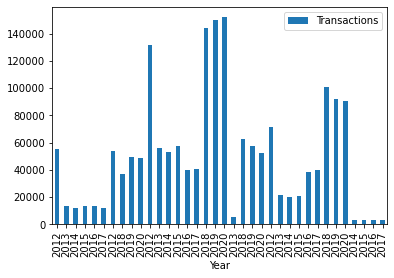

In [ ]:
# Create a line graph to show where transactions vs. country of car
country_concat.plot(kind='', x='Year', y=['Transactions', 'Country'])

# plt.bar(years, transactions)
# plt.show()

In [ ]:
# Try some counts
country_counts = clean_sales_df['Country'].value_counts()
country_counts.head(10)

GERMANY           2482
JAPAN             2398
UNITED STATES      497
AUSTRALIA          468
ITALY              373
THAILAND           329
SOUTH KOREA        306
CHINA              238
UNITED KINGDOM     205
SPAIN              192
Name: Country, dtype: int64

In [ ]:
# Define groups of years


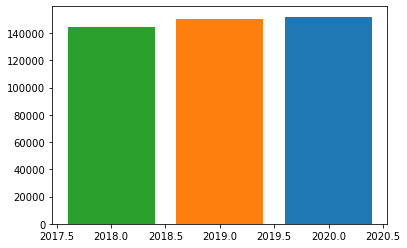

In [ ]:
# Try  plotting multiple df on one plot
fig = plt.figure()

for frame in [country_largest_2020, country_largest_2019, country_largest_2018]:
    plt.bar(frame['Year'],frame['Transactions'])

plt.show()

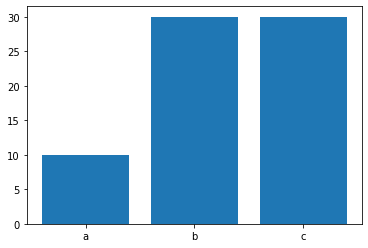

In [ ]:
# Create a line graph to show where transactions vs. country of car
years = ['a', 'b', 'c']
transactions = [10, 30, 30]

# x_value = clean_sales_grouped['Country']
# y_value = clean_sales_grouped['Transactions']
# plt.bar(x_value,y_value)
# plt.show()

plt.bar(years, transactions)
plt.show()

In [ ]:
# Create a new merged df with interesting characteristics of cars vs transactions
# NOTE need to sum transactions by year somehow - or maybe this already is taken into account based on 'Year' column
merged_df = pd.merge(clean_sales_df,redbook_data,on='MakMod')
merged_df.head(10)
# merged_df.dtypes

,Year,Transaction Type,Make Name,Model Name,MakMod,Body Shape Name,Vechile Type,Transactions,Country,Redbook_Code,...,Piston_type,Country_of_origin,Wheel_type,Fuel_efficiency_low_(L/100km),Fuel_efficiency_high_(L/100km),2021_sale_price_wholesale_low,2021_sale_price_wholesale_high,2021_sale_price_retail_low,2021_sale_price_retail_high,Retail_price_when_new
0,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAA,...,Rack and Pinion,POLAND,"16x6.5f, 16x6.5r",7.8,7.9,-,-,-,-,"26,990"
1,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAB,...,Rack and Pinion,POLAND,"16x6.5f, 16x6.5r",8.0,7.6,-,-,-,-,"28,990"
2,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAC,...,Rack and Pinion,POLAND,"16x6.5f, 16x6.5r",7.8,7.9,-,-,-,-,"29,990"
3,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAD,...,Rack and Pinion,POLAND,"16x6.5f, 16x6.5r",8.0,7.6,-,-,-,-,"31,990"
4,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAE,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",6.7,7.9,-,-,-,-,"31,990"
5,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAF,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",6.9,7.6,-,-,-,-,"33,990"
6,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAG,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",6.7,7.9,-,-,-,-,"35,990"
7,2021,Registration New Business,ABARTH,595,2021ABA595,HATCHBACK,PASSENGER,1,POLAND,AUVABAR2021AEAH,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",6.9,7.6,-,-,-,-,"37,990"
8,2021,Registration New Business,ASTON MARTIN,DB11,2021ASTDB1,COUPE,PASSENGER,1,UNITED KINGDOM,AUVASTO2021AEAA,...,Rack and Pinion,UNITED KINGDOM,"20x9.0f, 20x11.0r",3.9,13.5,-,-,-,-,"382,495"
9,2021,Registration New Business,ASTON MARTIN,DB11,2021ASTDB1,COUPE,PASSENGER,1,UNITED KINGDOM,AUVASTO2021AEAB,...,Rack and Pinion,UNITED KINGDOM,"20x9.0f, 20x11.0r",3.7,16.6,-,-,-,-,"437,400"


In [ ]:
# Exclude anything with <100 transactions
popular_merged = merged_df.loc[merged_df.Transactions > 100]
popular_merged.head()

,Year,Transaction Type,Make Name,Model Name,MakMod,Body Shape Name,Vechile Type,Transactions,Country,Redbook_Code,...,Piston_type,Country_of_origin,Wheel_type,Fuel_efficiency_low_(L/100km),Fuel_efficiency_high_(L/100km),2021_sale_price_wholesale_low,2021_sale_price_wholesale_high,2021_sale_price_retail_low,2021_sale_price_retail_high,Retail_price_when_new
20,2021,Registration New Business,AUDI,A1,2021AUDA1,HATCHBACK,PASSENGER,118,SPAIN,AUVAUDI2021AEAX,...,Rack and Pinion,SPAIN,"16x6.5f, 16x6.5r",9.4,6.3,-,-,-,-,"32,750"
21,2021,Registration New Business,AUDI,A1,2021AUDA1,HATCHBACK,PASSENGER,118,SPAIN,AUVAUDI2021AEAY,...,Rack and Pinion,SPAIN,"17x7.5f, 17x7.5r",7.7,7.2,-,-,-,-,"35,290"
22,2021,Registration New Business,AUDI,A1,2021AUDA1,HATCHBACK,PASSENGER,118,SPAIN,AUVAUDI2021AEAZ,...,Rack and Pinion,SPAIN,"18x7.5f, 18x7.5r",6.5,8.0,-,-,-,-,"46,450"
32,2021,Registration New Business,AUDI,A4,2021AUDA4,SEDAN,PASSENGER,298,GERMANY,AUVAUDI2021AEBK,...,Rack and Pinion,GERMANY,"19x8.5f, 19x8.5r",8.9,7.7,-,-,-,-,"55,900"
33,2021,Registration New Business,AUDI,A4,2021AUDA4,SEDAN,PASSENGER,298,GERMANY,AUVAUDI2021AEBL,...,Rack and Pinion,GERMANY,"19x8.5f, 19x8.5r",8.9,7.7,-,-,-,-,"59,900"


In [ ]:
# Look at how fuel efficiency has changed in the transaction vehicles



# Create X type of graph